In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/HPG 1D.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,open,high,low,close,Volume
0,2012-01-13,1149.197186,1149.197186,1128.675808,1135.516267,3684665
1,2012-01-16,1142.356727,1176.559024,1142.356727,1149.197186,3029894
2,2012-01-17,1149.197186,1162.878105,1142.356727,1149.197186,2679914
3,2012-01-18,1149.197186,1156.037646,1142.356727,1156.037646,1770468
4,2012-01-19,1162.878105,1197.080402,1156.037646,1197.080402,3271107
...,...,...,...,...,...,...
2751,2023-02-16,20950.000000,21400.000000,20600.000000,21300.000000,23914900
2752,2023-02-17,21300.000000,21350.000000,21000.000000,21000.000000,13693700
2753,2023-02-20,21000.000000,21900.000000,21000.000000,21900.000000,25741700
2754,2023-02-21,22050.000000,22300.000000,21600.000000,21600.000000,21439100


In [4]:
X = []
y = []
for i in range(5 , len(df.values)):
    X.append((df['close'].values)[i-5:i])
    y.append((df['close'].values)[i])

In [5]:
X_reverse = np.fliplr(X)

In [6]:
X_train = X_reverse[0:math.ceil(len(X)*0.8 )]
X_test = X_reverse[math.ceil(len(X)*0.8 ):]
y_train = y[0:math.ceil(len(y)*0.8 )]
y_test = y[math.ceil(len(y)*0.8 ):]

In [7]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.896e+05
Date:                Sun, 19 Mar 2023   Prob (F-statistic):                        0.00
Time:                        07:06:49   Log-Likelihood:                         -14553.
No. Observations:                2201   AIC:                                  2.912e+04
Df Residuals:                    2196   BIC:                                  2.914e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
X_train_1 = np.delete(X_train, 1, axis=1)
X_test_1 = np.delete(X_test, 1, axis=1)

In [9]:
results = linear_model.LinearRegression()
results.fit(X_train, y_train)

LinearRegression()

In [10]:
results.coef_

array([ 0.98693616,  0.04926583, -0.09075257,  0.14325961, -0.08792263])

In [11]:
results.intercept_

2.9464181244848078

In [12]:
y_train_pred = results.predict(X_train)

In [13]:
mae = np.mean(np.abs(y_train - y_train_pred))
mae

108.31838942879718

In [14]:
rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse

180.02325323510104

In [15]:
mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) 
mape

0.015450838626883972

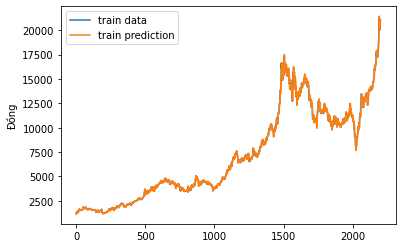

In [16]:
plt.plot(y_train)
plt.plot(y_train_pred)
plt.legend(['train data', 'train prediction'])
plt.ylabel('Đồng')
plt.show()

In [17]:
y_test_pred = results.predict(X_test)

In [18]:
mae = np.mean(np.abs(y_test - y_test_pred))
mae

529.8546327286366

In [19]:
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
rmse

711.8376066968027

In [20]:
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) 
mape

0.019280064574780147

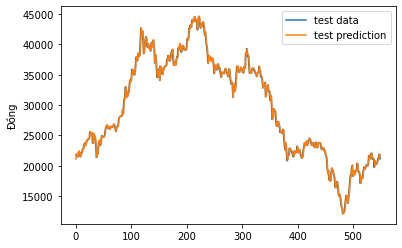

In [21]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.legend(['test data', 'test prediction'])
plt.ylabel('Đồng')
plt.show()

In [22]:
model1 = sm.OLS(y_train, X_train_1).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.236e+06
Date:                Sun, 19 Mar 2023   Prob (F-statistic):                        0.00
Time:                        07:08:44   Log-Likelihood:                         -14555.
No. Observations:                2201   AIC:                                  2.912e+04
Df Residuals:                    2197   BIC:                                  2.914e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
results1 = linear_model.LinearRegression()
results1.fit(X_train_1, y_train)

LinearRegression()

In [24]:
results1.coef_

array([ 1.01147577, -0.0674733 ,  0.14709953, -0.09032407])

In [25]:
results1.intercept_

2.990280525908929

In [26]:
y_train_pred_1 = results1.predict(X_train_1)

In [27]:
mae = np.mean(np.abs(y_train - y_train_pred_1))
mae

108.40366252213461

In [28]:
rmse = np.sqrt(np.mean((y_train - y_train_pred_1) ** 2))
rmse

180.13496615753482

In [29]:
mape = np.mean(np.abs((y_train - y_train_pred_1) / y_train)) 
mape

0.015455166480755997

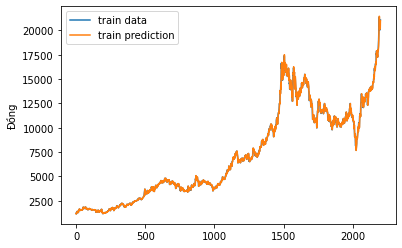

In [30]:
plt.plot(y_train)
plt.plot(y_train_pred_1)
plt.legend(['train data', 'train prediction'])
plt.ylabel('Đồng')
plt.show()

In [31]:
y_test_pred_1 = results1.predict(X_test_1)

In [32]:
mae = np.mean(np.abs(y_test - y_test_pred_1))
mae

529.0616193341457

In [33]:
rmse = np.sqrt(np.mean((y_test - y_test_pred_1) ** 2))
rmse

709.3186180595781

In [34]:
mape = np.mean(np.abs((y_test - y_test_pred_1) / y_test)) 
mape

0.019250686791484038

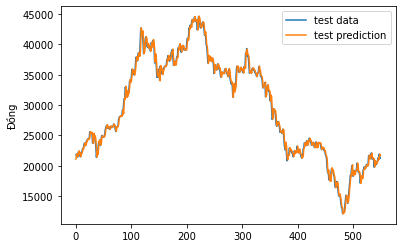

In [35]:
plt.plot(y_test)
plt.plot(y_test_pred_1)
plt.legend(['test data', 'test prediction'])
plt.ylabel('Đồng')
plt.show()